In [48]:
import os
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

data_path = os.path.join('C:\\','Data','pg_risk_analysis')
tc_path = os.path.join(data_path,'tc_netcdf')

filename = os.path.join(tc_path, f'STORM_FIXED_RETURN_PERIODS_WP.nc')

# load data from NetCDF file
with xr.open_dataset(filename) as ds:

    # convert data to WGS84 CRS
    ds.rio.write_crs(4326, inplace=True)
    #ds = ds.rio.clip_box(minx=bbox[0], miny=bbox[1], maxx=bbox[2], maxy=bbox[3])

    #convert 10-min sustained wind speed to 3-s gust wind speed
    ds['mean_3s'] = ds['mean']/0.88*1.11

    # get the mean values
    storm_data = ds['mean_3s'].to_dataframe().unstack(level=2).reset_index()
    #print(storm_data['spatial_ref'][20])

#columns_to_keep = [('spatial_ref', 1000.0), ('lon', ''), ('lat', '')]
#wind_speed = storm_data.loc[:, columns_to_keep]
wind_speed = pd.DataFrame({'wind_speed':storm_data['spatial_ref'][1000.0],
                           'lon':storm_data['lon'],
                           'lat':storm_data['lat']})

In [49]:
wind_speed

,wind_speed,lon,lat
0,0,100.05,5.05
1,0,100.15,5.05
2,0,100.25,5.05
3,0,100.35,5.05
4,0,100.45,5.05
...,...,...,...
440545,0,179.65,59.95
440546,0,179.75,59.95
440547,0,179.85,59.95
440548,0,179.95,59.95


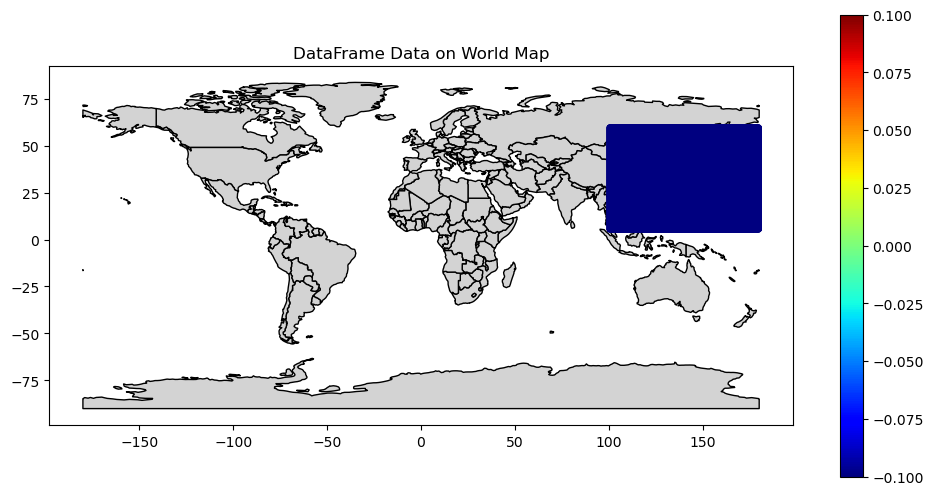

In [51]:
# 将DataFrame数据转换为Geopandas GeoDataFrame
gdf = gpd.GeoDataFrame(wind_speed, geometry=gpd.points_from_xy(wind_speed.lon, wind_speed.lat))
#print(gdf['spatial_ref'])

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(12, 6))

world.plot(ax=ax, color='lightgray', edgecolor='black')

gdf.plot(ax=ax, markersize=5, column='wind_speed', cmap='jet', legend=True)

plt.title('DataFrame Data on World Map')

plt.show()